### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
hr = pd.read_csv("HR_Missing_Vslues.csv")
hr.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [3]:
hr.describe(exclude= 'number')

,Employee_Name,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,RecruitmentSource
count,218,311,280,249,311,311,311,104,311,311,311
unique,218,32,276,2,5,6,101,96,6,21,9
top,"Adinolfi, Wilson K",Production Technician I,06/14/87,F,Single,White,1/10/2011,8/19/2018,Production,Michael Albert,Indeed
freq,1,137,2,141,137,187,14,2,209,22,87


In [49]:
hr['RaceDesc'].unique()

array(['White', 'Black or African American', 'Two or more races', 'Asian',
       'American Indian or Alaska Native', 'Hispanic'], dtype=object)

### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

# Qualitative Data
# Bar chart

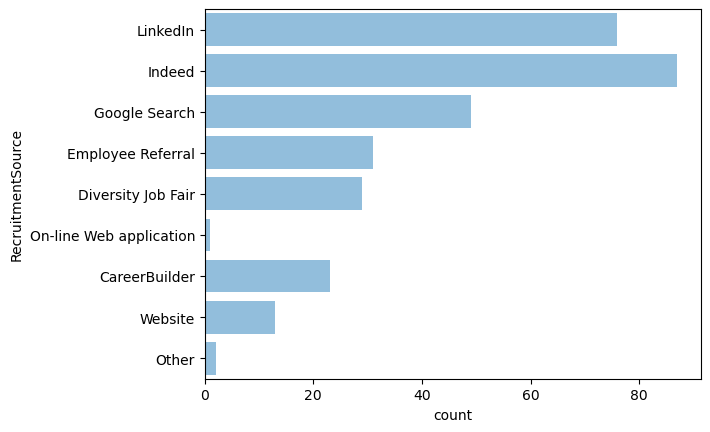

In [63]:
#Qualitative Data
#Bar chart
sns.countplot(data=hr, y ='RecruitmentSource', color = '#85C1E9');


#### Write your insghts here

### Here in bar chart Recruitment Source (indeed) is high then linkedin,and Recruitment Source( online web application) is lower count

# Quantitative Data
# Density

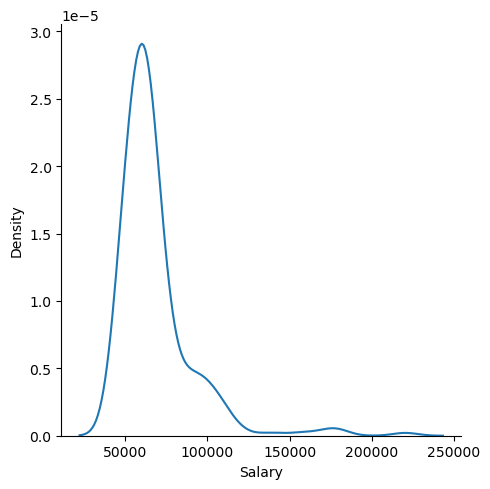

In [64]:

sns.displot(hr, x="Salary", kind="kde");


#### Write your insghts here

### between 50,0000 and 100,000 is high density

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

# Quantitative Vs. Qualitative
# Box plot

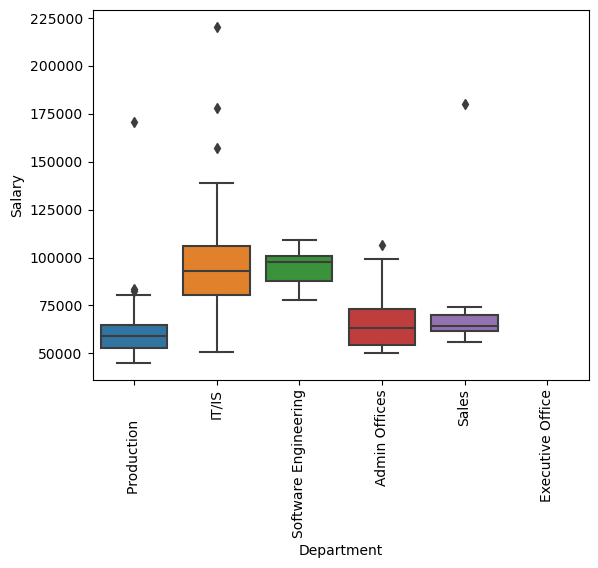

In [65]:
#sns.lineplot(data=hr, x="Department", y="Salary")
#plt.xticks(rotation=90);

sns.boxplot(data=hr, y="Salary", x="Department" );
plt.xticks(rotation=90);


### There are outlier in production, IT\IS,sales and admin offices but IT\IS is high

# Quantitative Vs. Quantitative
# Scatter Plot

In [80]:
#d=hr.loc[hr['Sex'] !='M']
#d

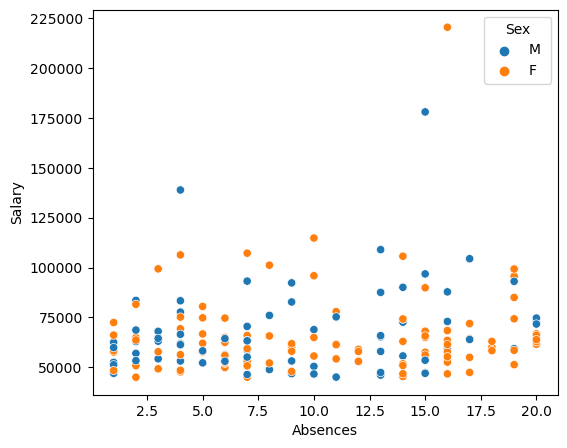

In [83]:
plt.figure(figsize=(6,5))

sns.scatterplot( data=hr, x="Absences", y="Salary", hue="Sex");



#### Write your insghts here

#### Write your insghts here

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

# Bar

In [68]:
depart=hr.loc[hr['Department'] !='Executive Office']
depart

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN


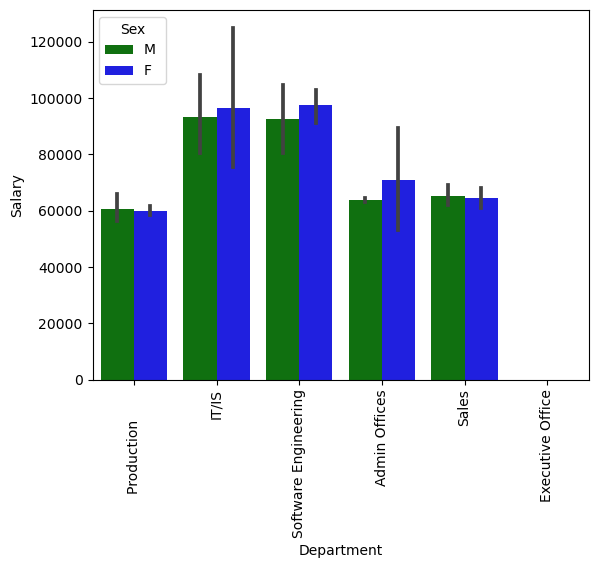

In [46]:
sns.barplot(data=hr, x="Department", y="Salary", hue ='Sex',
            palette=sns.color_palette(['green', 'blue']));
plt.xticks(rotation=90);


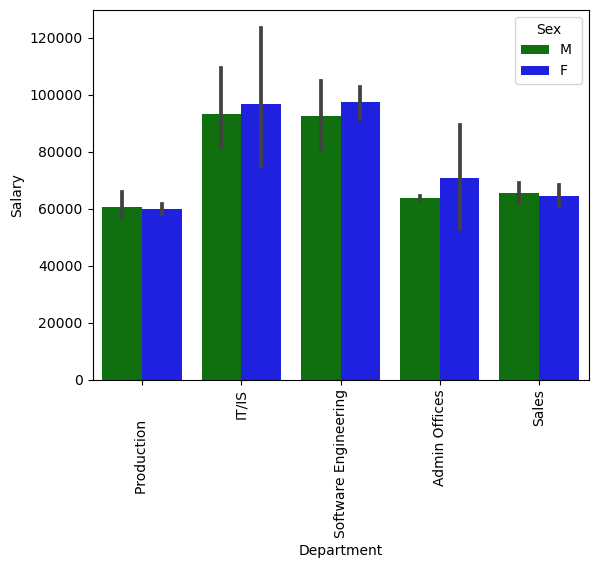

In [47]:
sns.barplot(data=depart, x="Department", y="Salary", hue ='Sex',
            palette=sns.color_palette(['green', 'blue']));
plt.xticks(rotation=90);

#### Write your insghts here

### First Executive Office is empty don't important
### IT\IS and Software close to each other and they are the highest salary
### there are error bar high in female (it\is and admin offices) (which represents the uncertainty or variation) 